<a href="https://colab.research.google.com/github/xiaoyaoyang/leetcode/blob/master/leetcode_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import

In [ ]:
# !pip3 install ColabTurtle
# import ColabTurtle.Turtle as t

In [ ]:
# t.initializeTurtle()
# # color('red', 'yellow')
# # begin_fill()
# while True:
#     t.forward(200)
#     t.left(170)
#     pos = t.turtle_pos
#     pos_abs = (pos[0]**2 + pos[1]**2)**(1/2)
#     print(pos_abs)
#     if pos_abs < 1:
#         break
# end_fill()
# done()

In [ ]:
#import
from typing import List
import copy
from collections import Counter
import heapq

class TreeNode:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
    def __repr__(self):
        return 'TreeNode({})'.format(self.val)
    
def deserialize(string):
    if string == '{}':
        return None
    nodes = [None if val == 'null' else TreeNode(int(val))
             for val in string.strip('[]{}').split(',')]
    kids = nodes[::-1]
    root = kids.pop()
    for node in nodes:
        if node:
            if kids: node.left  = kids.pop()
            if kids: node.right = kids.pop()
    return root

def drawtree(root):
    def height(root):
        return 1 + max(height(root.left), height(root.right)) if root else -1
    def jumpto(x, y):
        t.penup()
        t.goto(x, y)
        t.pendown()
    def draw(node, x, y, dx):
        if node:
            t.goto(x, y)
            jumpto(x, y-20)
            t.write(node.val, align='center', font=('Arial', 12, 'normal'))
            draw(node.left, x-dx, y-60, dx/2)
            jumpto(x, y-20)
            draw(node.right, x+dx, y-60, dx/2)
    import turtle 
    t = turtle.Turtle()
    t.speed(0); turtle.delay(0)
    h = height(root)
    jumpto(0, 30*h)
    draw(root, 0, 30*h, 40*h)
    t.hideturtle()
    turtle.mainloop()
    
if __name__ == '__main__':
    deserialize('[1,2,3,null,null,4,null,null,5]')
    # drawtree(deserialize('[2,1,3,0,7,9,1,2,null,1,0,null,null,8,8,null,null,null,null,7]'))
t = deserialize('[1,2,3,null,4,null,null,5]')
t2 = copy.deepcopy(t)
bst = deserialize('[6,2,8,0,4,7,9,null,null,3,5]')
t3 = deserialize('[3,5,1,6,2,0,8,null,null,7,4]')
bst2 = deserialize('[0,-1]')


14. Longest Common Prefix


In [ ]:
from typing import List
class Solution:
    def longestCommonPrefix(self, strs: List[str]) -> str:
        if len(strs) == 0: return ""
        if len(strs) == 1: return strs[0]
        word_base = strs[0]
        word_base_length = len(word_base)
        min_prefix_length = float("inf")
        for word in strs[1:]:
          word_length = len(word)
          search_length = min(word_length,word_base_length)
          prefix_length = 0
          for i in range(1,search_length+1):
            # print(f'compare {word_base[:i]} and { word[:i]}')
            # print(prefix_length)
            if word_base[:i] == word[:i]:
              prefix_length=i
            else:
              break
        #   print(f'prefix len:{prefix_length}')
          if prefix_length == 0: return("")
          if prefix_length<min_prefix_length:
            min_prefix_length = prefix_length

        if min_prefix_length>0:
          return word_base[:min_prefix_length]
        else:
          return ""

        

In [ ]:
test = Solution()
test.longestCommonPrefix(["a","a","b"])

''

In [ ]:
test.longestCommonPrefix(["flower","flow","flight"])

'fl'

15. 3Sum *(need to be optimized)*


In [ ]:
from typing import List
import itertools
class Solution:
    def __init__(self):
      self.dict_2 = {}
      self.dict_3 = {}
      self.result = list()
    def twoSum(self, target, lst, index):
      self.dict_2 = {}
      for i in range(len(lst)):
        if lst[i] in self.dict_2:
          if self.dict_3.get(target) is None:
            self.dict_3[target] = list()
            self.dict_3[target].append(list([self.dict_2[lst[i]], i + index]))
          else:
            self.dict_3[target].append(list([self.dict_2[lst[i]], i + index]))
          self.result.append([-target,self.nums[self.dict_2[lst[i]]], self.nums[i+index]])
        else:
          self.dict_2[target-lst[i]] = i + index  # original nums
      return self.dict_3

    def threeSum(self, nums: List[int]) -> List[List[int]]:
      nums.sort() 
      self.nums = nums.copy()
    #   print(nums)
      dict_3 = self.dict_3
      i = 0
      while len(nums)>0:
        pop_value = nums.pop(0)
        # if not found in self.dict_3 run 
        if -pop_value not in self.dict_3:
          res = self.twoSum(-pop_value, nums, i+1)
        # print(f'{i} {pop_value}:{res} , {nums}')
        i = i+ 1
      self.result = list(k for k,_ in itertools.groupby(self.result))
      return self.result
         
        

In [ ]:
test = Solution()
test.threeSum([-4,-2,1,-5,-4,-4,4,-2,0,4,0,-2,3,1,-5,0])

[[-5, 1, 4], [-4, 1, 3], [-4, 0, 4], [-2, 1, 1], [-2, -2, 4], [0, 0, 0]]

17. Letter Combinations of a Phone Number

In [ ]:
from typing import List
class Solution:
    def __init__(self):
        self.map_dict = {
            1:"",
            2:"abc",
            3:"def",
            4:"ghi",
            5:"jkl",
            6:"mno",
            7:"pqrs",
            8:"tuv",
            9:"wxyz",
        }       
    def helper(self, d):
        if len(d) == 1: 
            return [i for i in self.map_dict.get(int(d))]
        return [ans + i for ans in self.helper(d[:-1]) for i in self.map_dict.get(int(d[-1]))]


    def letterCombinations(self, digits: str) -> List[str]:
        if digits == '': return []
        return self.helper(digits)


      




In [ ]:
test = Solution()

In [ ]:
test.letterCombinations("56")

['jm', 'jn', 'jo', 'km', 'kn', 'ko', 'lm', 'ln', 'lo']

20. Valid Parentheses

In [ ]:
class Solution:
    def isValid(self, s: str) -> bool:
        q = []
        mapping = {"(":")","{":"}","[":"]"}
        for i in s:
            if i in list(mapping.keys()):
                q.append(mapping.get(i))
                continue
            if q == []: return False
            if i == q[-1]:
                q = q[:-1]
            else:
                return False
        if q == []:
            return True
        else:
            return False

                

In [ ]:
test = Solution()
test.isValid("[")

False

21. Merge Two Sorted Lists


In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def mergeTwoLists(self, l1: ListNode, l2: ListNode) -> ListNode:
        

SyntaxError: ignored

22. Generate Parentheses


In [ ]:
class Solution:
    def helper(self,
               n,
               final_result,
               result = "(", 
               result_length = 1, 
               valid_index = 1,
               ):
        # print(f'{valid_index} {result_length}')
    # termination condition
        if result_length == 2*n-1 and valid_index ==1:
            return final_result.append(result + ")")
        if result_length == 2*n-1:
            return True
        if valid_index ==0:
            return  self.helper(n,final_result,result + "(" , result_length+1, valid_index+1)
        if valid_index>0 and valid_index<n:
            return  [self.helper(n,final_result,result + "(" , result_length+1, valid_index+1), self.helper(n,final_result,result + ")" , result_length+1, valid_index-1)]
        if valid_index ==n:
            return  self.helper(n,final_result,result + ")" , result_length+1, valid_index-1)
        return False

    def generateParenthesis(self, n: int) -> List[str]:
        final_result = []
        self.helper(n,final_result)
        return final_result




        

In [ ]:
test = Solution()
test.generateParenthesis(3)

['((()))', '(()())', '(())()', '()(())', '()()()']

23. Merge k Sorted Lists

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

# class Solution:
#     def mergeKLists(self, lists: List[ListNode]) -> ListNode:
#         if lists == [[]]:
#             return None
#         #initial
#         final_result = ListNode(None)
#         loop_result = final_result
#         current = [i.val if i != None else None for i in lists ]
#         print(current)
#         i=0
#         while not all(v is None for v in current):
#             print(i)
#             # Find min
#             print(current)
#             min_value = min([i for i in current if i!=None ])
#             min_index = current.index(min_value)
#             # action
#             lists[min_index] = lists[min_index].next
#             loop_result.next = ListNode(min_value)
#             loop_result = loop_result.next
#             # update
#             current = [i.val if i != None else None for i in lists ]
#             i = i+1
#         return final_result.next

# TIME LIMIT EXCEED
        

In [ ]:
class Solution:
    def mergeKLists(self, lists: List[ListNode]) -> ListNode:
        if lists == [[]]:
            return None
        res = []
        for i in lists:
            while i is not None:
                res.append(i.val)
                i = i.next
        res.sort()
        result = ListNode()
        tmp = result
        for i in res:
            tmp.next = ListNode(i)
            tmp = tmp.next
        return result.next

In [ ]:
from Queue import PriorityQueue

class Solution(object):
    def mergeKLists(self, lists):
        """
        :type lists: List[ListNode]
        :rtype: ListNode
        """
        head = point = ListNode(0)
        q = PriorityQueue()
        for l in lists:
            if l:
                q.put((l.val, l))
        while not q.empty():
            val, node = q.get()
            point.next = ListNode(val)
            point = point.next
            node = node.next
            if node:
                q.put((node.val, node))
        return head.next

        

In [ ]:
import heapq
class Solution(object):
    def mergeKLists(self, lists):
        point = ListNode(0)
        head = point
        q=[]
        for l in lists:
            if l:
                heapq.heappush(q, (l.val,l))
        print(q)
        while q:
            val, node = heapq.heappop(q)
            point.next = ListNode(val)
            point = point.next
            node = node.next
            if node:
                heapq.heappush(q, (node.val,node))
        return head.next

In [ ]:
test = Solution()
r = test.mergeKLists([a,b])

[(1, <__main__.ListNode object at 0x7f84ffe6dd68>), (10, <__main__.ListNode object at 0x7f84ffe6de10>)]


In [ ]:
r

In [ ]:
a = ListNode(1)
a.next = ListNode(2)
a.next.next = ListNode(-1)
b = ListNode(10)
b.next = ListNode(3)
b.next.next = ListNode(5)

29. Divide Two Integers

use BitwiseOoperators to replace *2 /2

In [ ]:
class Solution:
# @return an integer
    def divide(self, dividend, divisor):
        positive = (dividend < 0) is (divisor < 0)
        dividend, divisor = abs(dividend), abs(divisor)
        res = 0
        while dividend >= divisor:
            temp, i = divisor, 1
            while dividend >= temp:
                dividend -= temp
                res += i
                i <<= 1 # i = i*2
                temp <<= 1 # temp = temp*2
        if not positive:
            res = -res
        return min(max(-2147483648, res), 2147483647)

In [ ]:
class Solution:
# @return an integer
    def divide(self, dividend, divisor):
        positive = (dividend < 0) is (divisor < 0)
        dividend, divisor = abs(dividend), abs(divisor)
        res = 0
        while dividend >= divisor:
            temp, i = divisor, 1
            while dividend >= temp:
                dividend -= temp
                res += i
                i = i*2
                temp = temp*2
        if not positive:
            res = -res
        return min(max(-2147483648, res), 2147483647)

In [ ]:
test = Solution()

In [ ]:
test.divide(6,2)

3

31. Next Permutation

33. Search in Rotated Sorted Array


In [ ]:
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        if nums == []: return -1
        first = nums[0]
        last = nums[-1]
        l = 0
        r = len(nums)-1
        if target < first and target > last:
            return -1
        if target < first and target <=last:
            # search smaller than last
            while l<r-1:
                c = int((l+r)/2)
                if nums[c]==target: return c
                if nums[c]>last:
                    l = c
                    continue
                if nums[c]>target:
                    r = c
                else:
                    l = c
        if target >= first:  #  and target >last 
        # why target can <=last, need to be rotated??
            # search larger than first
            while l<r-1:
                c = int((l+r)/2)
                if nums[c]==target: return c
                if nums[c]<first:
                    r = c
                    continue
                if nums[c]>target:
                    r = c
                else:
                    l = c

        if nums[l] == target:
            return l
        if nums[r] == target:
            return r
        return -1


In [ ]:
test = Solution()
test.search([1,3,5],3)

1

38. Count and Say


In [ ]:
class Solution:
    def countAndSay(self, n: int) -> str:
        return str(self.helper(n))
    def helper(self,n):
        if n==1 : 
            return 1
        input = self.helper(n-1)
        if len(str(input)) ==1:
            return 10*input+input
        output = ""
        continue_count = 0
        previous_val = None
        for i,val in enumerate(str(input)):
            if i==0:
                continue_count = continue_count +1
                previous_val = val
                continue
            if i >0:
                if val == previous_val:
                    continue_count = continue_count +1
                else:
                    output = output + str(continue_count)
                    output = output + previous_val
                    previous_val = val
                    continue_count = 1
                if i<len(str(input))-1:
                    continue
                else:
                    output = output + str(continue_count)
                    output = output + previous_val
        return int(output)




In [ ]:
test = Solution()
test.countAndSay(6)

'312211'

41. First Missing Positive


In [ ]:
class Solution:
    def firstMissingPositive(self, nums: List[int]) -> int:
        nums_set = set(nums)
        i=1
        while True:
            if i in nums_set:
                i = i+1
            else:
                return i

In [ ]:
test = Solution()
test.firstMissingPositive([1,2,3])

1

43. Multiply Strings


In [ ]:
class Solution:
    def multiply(self, num1, num2):
        product = [0] * (len(num1) + len(num2))
        pos = len(product)-1
        
        for n1 in reversed(num1):
            tempPos = pos
            for n2 in reversed(num2):
                print(product,tempPos)
                product[tempPos] += int(n1) * int(n2)
                product[tempPos-1] += product[tempPos]//10
                product[tempPos] %= 10
                tempPos -= 1
            pos -= 1
            
        pt = 0
        while pt < len(product)-1 and product[pt] == 0:
            pt += 1

        return ''.join(map(str, product[pt:]))

In [ ]:
num1 = "23"; num2 = "3444"
test = Solution()
test.multiply(num1, num2)

[0, 0, 0, 0, 0, 0] 5
[0, 0, 0, 0, 1, 2] 4
[0, 0, 0, 1, 3, 2] 3
[0, 0, 1, 3, 3, 2] 2
[0, 1, 0, 3, 3, 2] 4
[0, 1, 0, 4, 1, 2] 3
[0, 1, 1, 2, 1, 2] 2
[0, 1, 9, 2, 1, 2] 1


'79212'

49. Group Anagrams
2 methods, count(distribution) or unique sorted list.

In [ ]:
import collections
class Solution:
    def groupAnagrams(self,strs):
        ans = collections.defaultdict(list)
        for s in strs:
            count = [0] * 26
            for c in s:
                count[ord(c) - ord('a')] += 1 # 0-23 map to 24 letters
            ans[tuple(count)].append(s) # tuple(count) is distribution, s is the string
        return ans.values()

In [ ]:
test = Solution()
test.groupAnagrams(["eat", "tea", "tan", "ate", "nat", "bat"])

dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])

In [ ]:
collections.defaultdict(list)

defaultdict(list, {})

53. Maximum Subarray


In [ ]:
class Solution:
    def maxSubArray(self, nums: List[int]) -> int:
        if nums == []: return []
        if len(nums) == 1: return nums[0]
        l=0
        r=0
        l_max = 0
        r_max = 0
        current_sum = nums[0]
        current_max = nums[0]
        for i in range(1,len(nums)):
            print(f'iter {i}')
            if current_sum + nums[i] <= nums[i]: # changer left
                l=i
                r=i
                current_sum = nums[i]
                if current_max <current_sum:
                    l_max = l
            else:
                current_sum = current_sum + nums[i]
            if current_max <current_sum:
                r=i
                r_max = i
                current_max = current_sum
            print(f'{l_max} {r_max} {current_sum} {current_max}')
        return current_max

            


In [ ]:
class Solution:
    def maxSubArray(self, nums: List[int]) -> int:
        if nums == []: return []
        if len(nums) == 1: return nums[0]
        current_sum = nums[0]
        current_max = nums[0]
        for i in range(1,len(nums)):
            if current_sum + nums[i] <= nums[i]: # changer left
                current_sum = nums[i]
            else:
                current_sum = current_sum + nums[i]
            if current_max <current_sum:
                current_max = current_sum
        return current_max

            


In [ ]:
test = Solution()
nums = [1,-3,-3]
test.maxSubArray(nums)

1

In [ ]:
for i in range(len(nums)):
    print(i)

0
1
2
3
4
5
6
7
8


54. Spiral Matrix


In [ ]:
class Solution:
    def spiralOrder(self, matrix: List[List[int]]) -> List[int]:
        if matrix == []:
            return []
        n_r = len(matrix) -1
        n_c = len(matrix[0]) -1
        c_ttl = (n_r+1)*(n_c+1)
        c_left = c_ttl
        r = 0
        result_lst = []
        while c_left>0:
            # print(f'r:{r} {n_c}')
            # print(f"left {c_left}")
            for j in range(r,n_c-r+1):
                result_lst.append(matrix[r][j])
            c_left = c_left -(n_c-2*r+1)
            if c_left==0:
                break
            for i in range(r+1,n_r-r+1):
                result_lst.append(matrix[i][n_c-r])
            c_left = c_left -(n_r-2*r)
            if c_left==0:
                break
            for j in range(n_c-r-1,r-1,-1):
                print(j)
                result_lst.append(matrix[n_r-r][j])
            c_left = c_left -(n_c-2*r)
            if c_left==0:
                break
            for i in range(n_r-r-1,r,-1):
                result_lst.append(matrix[i][r])
            r = r +1
            if (n_c-2*r+1) <=0 or (n_r-2*r+1) <=0:
                c_left=0
                break
            else:
                c_left = (n_c-2*r+1) * (n_r-2*r+1)
        return result_lst


In [ ]:
matrix = [
  [],

]
n_r = len(matrix) -1
n_c = len(matrix[0]) -1

In [ ]:
test = Solution()
test.spiralOrder(matrix)

[]

55. Jump Game


In [ ]:
class Solution:
    def canJump(self, nums: List[int]) -> bool:
        current_pos = len(nums)-2
        min_good_pos = len(nums)-1
        while current_pos >=0:
            if nums[current_pos] + current_pos >= min_good_pos :
                min_good_pos = current_pos
                current_pos = current_pos -1
                continue
            else:
                current_pos = current_pos -1
                continue

            
        if min_good_pos == 0:
            return True
        else:
            return False

In [ ]:
test = Solution()
test.canJump([2,1,0,1])

False

56. Merge Intervals

In [ ]:
class Solution:
    def merge(self, intervals: List[List[int]]) -> List[List[int]]:
        intervals.sort()
        result = []
        for interval in intervals:
            if not result or (interval[0]>result[-1][1]):
                result.append(interval)
            else:
                result[-1] = [result[-1][0], max(result[-1][1],interval[1])]
        return result

# class Solution:
#     def merge(self, intervals: List[List[int]]) -> List[List[int]]:
#         # if intervals == []: return []
#         # if len(intervals) ==1: return intervals
#         intervals.sort()
#         intervals.append([float("inf"),float("inf")]) # for triggering the merge!
#         results = []
#         l, r = intervals[0][0], intervals[0][1]
#         for i in range(1,len(intervals)):
#             interval = intervals[i]
#             if interval[0]<=r:
#                 r = max(r,interval[1])
#                 continue
#             else:
#                 results.append([l,r])
#                 l, r = interval[0], interval[1]
#         return results


In [ ]:
test_lst = [[1,3],[1,2],[2,6],[15,18],[8,10],]

In [ ]:
test = Solution()
test.merge(test_lst)

[[1, 6], [8, 10], [15, 18]]

62. Unique Paths


In [ ]:
class Solution:
    def __init__(self):
        self.count = 0
    def helper(self, m,n):
        if m ==0 and n==0:
            self.count = self.count +1
            return True
        if m>0:
            # print(f'{m} {n}')
            self.helper(m-1,n)
        if n>0:
            # print(f'{m} {n}')
            self.helper(m,n-1)
    def uniquePaths(self, m: int, n: int) -> int:
        # m = col, n = row
        self.helper(m-1,n-1)
        return self.count

# Too slow
        

In [ ]:
test = Solution()
test.uniquePaths(23,12)

193536720

In [ ]:
class Solution:
    def __init__(self):
        self.visited = None
    def helper(self, m,n):
        # print(f'{m} {n}')
        if m <=0 or n<=0:
            return 0
        if m==1 or n ==1:
            return 1
        if self.visited[m][n]>0:
            return self.visited[m][n]
        left = self.helper(m-1,n)
        right = self.helper(m,n-1)
        self.visited[m][n] = left + right
        # print(self.visited)
        return self.visited[m][n]
    def uniquePaths(self, m: int, n: int) -> int:
        # m = col, n = row
        self.visited = [[0 for i in range(n+1)] for j in range(m+1)]
        return self.helper(m,n)

# Too slow, use memory
        

In [ ]:
test = Solution()
test.uniquePaths(23,12)

193536720

67. Add Binary

recursion....?

In [ ]:
class Solution:
    def addBinary(self, a: str, b: str) -> str:
        ans = ''
        def helper(a,b,r=0):
            nonlocal ans
            if not a and not b:
                ans = ans if r==0 else str(r) + ans
                return
            if not a:
                if r >0:
                    while b:
                        if b[-1]=='1':
                            ans = '0' + ans
                            b = b[:-1]
                        else:
                            break
                    ans = '1' + ans if b =='' else b[:-1] + '1' + ans
                else:
                    ans = b + ans
                return 
            if not b:
                if r >0:
                    while a:
                        if a[-1]=='1':
                            ans = '0' + ans
                            a = a[:-1]
                        else:
                            break
                    ans = '1' + ans if a =='' else a[:-1] + '1' + ans
                else:
                    ans = a + ans
                return 
            l_a = a[-1]
            l_b = b[-1]
            curr = int(l_a)+int(l_b)+int(r)
            curr_ans = str(curr%2) if curr>=2 else str(curr)
            r = 1 if curr>=2 else 0
            ans = curr_ans + ans
            return helper(a[:-1],b[:-1],r)
        helper(a,b)
        return ans

            





        

In [ ]:
class Solution:
    def addBinary(self, a, b) -> str:
        n = max(len(a), len(b))
        a, b = a.zfill(n), b.zfill(n) # fill zero, ljust rjust etc
        
        carry = 0
        answer = []
        for i in range(n - 1, -1, -1):
            sums = ord(a[i]) - ord('0') + ord(b[i]) - ord('0') + carry
            current_digit = sums % 2
            carry =  sums // 2
            answer.append(str(current_digit))
        
        if carry == 1:
            answer.append('1')
        answer.reverse()
        
        return ''.join(answer)

In [ ]:
a = "100"; b = "110010"
test = Solution() #
test.addBinary(a,b)

'110110'

70. Climbing Stairs
By storing result, it reduce complexity  from 2^n roughly to n^*2*

In [ ]:
class Solution:
    def climbStairs(self, n: int) -> int:
        results = [None for i in range(n)]
        def helper(n):
            if n ==1:
                return 1
            if n<=0 :
                return 0
            if n ==2:
                return 2
            if results[n-1] is None:
                results[n-1] = helper(n-1) + helper(n-2)
            return results[n-1]
        return helper(n)

In [ ]:
test = Solution()
test.climbStairs(10)

89

In [ ]:
# root = {}
node = root
node = node.setdefault('s', {})
# node = node.setdefault('w', {})

In [ ]:
node

{'w': {}}

72. Edit Distance


In [ ]:
class Solution:
    def minDistance(self, word1: str, word2: str) -> int:
        l1 = len(word1)
        l2 = len(word2)
        m = [[None for j in range(l2+1)] for i in range(l1+1)]
        return self.helper(word1,word2,m)
    
    def helper(self, word1, word2, m):
        l1 = len(word1)
        l2 = len(word2)
        if l1 == 0: return l2
        if l2 == 0: return l1
        if m[l1][l2] is not None: return m[l1][l2]
        # check if word is the same index = l1-1 since it start from 0
        if word1[l1-1]==word2[l2-1]:
            m[l1][l2] = self.helper(word1[:-1],word2[:-1],m)
        else:
            m[l1][l2] = min(self.helper(word1[:-1],word2[:-1],m),
                            self.helper(word1,word2[:-1],m),
                            self.helper(word1[:-1],word2,m)
            ) +1
        return m[l1][l2]





In [ ]:
word1 = 'aecd'
word2 = 'bcdp'

In [ ]:
test = Solution()
test.minDistance(word1,word2)

3

76. Minimum Window Substring


In [ ]:
from collections import Counter

In [ ]:
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        if not s or not t : return ""
        l, r = 0, 0
        len_s = len(s)
        dict_t, dict_s = Counter(t), {}
        required, current = len(dict_t), 0
        # save result, window len, left, right
        ans = float("inf"), None, None
        while l < len_s:
            # the window s[l:r+1] not contain full t
            while current<required and r<len_s:
                r_str = s[l:r+1][-1]
                dict_s[r_str] = dict_s.get(r_str,0) +1
                if dict_s.get(r_str) == dict_t.get(r_str):
                    current = current+1
                r = r+1
                # print(dict_s,l,r-1,current,required,"f")
                continue
            # s[l:r+1] still contain full t or right index to the end
            while (current == required or r>=len_s) and l<r:
                # save result
                if (r-l) < ans[0] and current == required:
                    ans = (r-l,l,r-1)
                    # print(ans)
                l_str = s[l]
                dict_s[l_str] = dict_s.get(l_str) -1
                if dict_t.get(l_str) and dict_s.get(l_str) < dict_t.get(l_str):
                    current = current - 1
                l = l + 1
                # print(l_str,l,r,current,required,"s")
        return "" if ans[0] == float("inf") else s[ans[1] : ans[2] + 1]

In [ ]:
test = Solution()
test.minWindow("a", "a")

'a'

In [ ]:
def minWindow(self, s, t):
    """
    :type s: str
    :type t: str
    :rtype: str
    """

    if not t or not s:
        return ""

    # Dictionary which keeps a count of all the unique characters in t.
    dict_t = Counter(t)

    # Number of unique characters in t, which need to be present in the desired window.
    required = len(dict_t)

    # left and right pointer
    l, r = 0, 0

    # formed is used to keep track of how many unique characters in t are present in the current window in its desired frequency.
    # e.g. if t is "AABC" then the window must have two A's, one B and one C. Thus formed would be = 3 when all these conditions are met.
    formed = 0

    # Dictionary which keeps a count of all the unique characters in the current window.
    window_counts = {}

    # ans tuple of the form (window length, left, right)
    ans = float("inf"), None, None

    while r < len(s):

        # Add one character from the right to the window
        character = s[r]
        window_counts[character] = window_counts.get(character, 0) + 1

        # If the frequency of the current character added equals to the desired count in t then increment the formed count by 1.
        if character in dict_t and window_counts[character] == dict_t[character]:
            formed += 1

        # Try and contract the window till the point where it ceases to be 'desirable'.
        while l <= r and formed == required:
            character = s[l]

            # Save the smallest window until now.
            if r - l + 1 < ans[0]:
                ans = (r - l + 1, l, r)

            # The character at the position pointed by the `left` pointer is no longer a part of the window.
            window_counts[character] -= 1
            if character in dict_t and window_counts[character] < dict_t[character]:
                formed -= 1

            # Move the left pointer ahead, this would help to look for a new window.
            l += 1    

        # Keep expanding the window once we are done contracting.
        r += 1    
    return "" if ans[0] == float("inf") else s[ans[1] : ans[2] + 1]

84. Largest Rectangle in Histogram
(stack!)

In [ ]:
class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        s = [-1]
        heights.append(0)
        h_len = len(heights)
        ans = 0
        for i in range(h_len):
            while heights[s[-1]] > heights[i]:
                h = heights[s.pop()]
                w = i - s[-1] -1
                ans = max(ans, h*w)
            s.append(i)
        return ans


In [ ]:
test = Solution()
test.largestRectangleArea([1,2,4,3,2,3,5])

12

88. Merge Sorted Array


In [ ]:
class Solution:
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        """
        Do not return anything, modify nums1 in-place instead.
        """
        i =0
        while nums2:
            m1_valid_len = len(nums1)-len(nums2)-1
            if i ==m+n:
                break
            if i>m1_valid_len:
                nums1.insert(i,nums2[0])
                nums1.pop()
                nums2.pop(0)
                continue
            if nums2[0]>nums1[i]:
                i +=1
            else:
                nums1.insert(i,nums2[0])
                nums1.pop()
                nums2.pop(0)
            # print(i,nums1,nums2)
            
            
            

In [ ]:
nums1 = [4,0,0,0,0,0]
m = 1
nums2 = [1,2,3,5,6]
n = 5

In [ ]:
test = Solution()
test.merge(nums1,m,nums2,n)

91. Decode Ways
?????


In [ ]:
class Solution:
    def numDecodings(self, s: str) -> int:
        stored = {}
        ans = self.helper(s,stored)
        return ans
    
    def helper(self,s,stored):
        # print(stored,s)
        if s in stored:
            return stored[s]
        # this part is a little bit tricky, s = "" means we reach the end and the base case combination is 1
        if s == "":
            return 1
        # 0 means the previous step is invalid, return 0 so that the 0 branch contribute 0 count!
        if s[0]=='0':
            return 0
        # either stop at 1 digit, or the 2 steps need a more require where >=10
        # if len(s)==1:
        #     return 1
        # One step
        ans = self.helper(s[1:],stored) 
        # Two step
        ans += self.helper(s[2:],stored) if int(s[0:2])<=26 and int(s[0:2])>=10 else 0
        stored[s] = ans
        return ans
        
# what to return? depend on what do you want to pass between recursive call. here we want to pass the combination number. Base case is the bottom, with 1 and 0. We want to recursively go up from the base to build up the whole word
# Also, since each problems could be divided to sub-problems, it's like S_n = f( S_(n-1), S_(n-2) ), or binary tree structure?
        

        

In [ ]:
test = Solution()
test.numDecodings('2619')

4

94. Binary Tree Inorder Traversal


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

# Recursive
class Solution:
    def inorderTraversal(self, root: TreeNode) -> List[int]:
        if root is None: return []
        ans = []
        def helper(root,ans):
            if root is None:
                return True
            helper(root.left,ans)
            ans.append(root.val)
            helper(root.right,ans)
            return ans
        return helper(root,ans)

In [ ]:
test = Solution()
test.inorderTraversal(t)

[2, 5, 4, 1, 3]

In [ ]:
# Iterative
class Solution:
    def inorderTraversal(self, root: TreeNode) -> List[int]:
        if root is None: return []
        n = root
        s = list()
        ans = list()
        while True:
            if n:
                s.append(n)
            #break condition
            if not s:
                break
            if  n is None or n.left is None:
                n = s.pop()
                ans.append(n.val)
                n = n.right
            else:
                n = n.left
        return ans

# the key is how to backward track tree with stack


In [ ]:
test = Solution()
test.inorderTraversal(t)

[2, 5, 4, 1, 3]

98. Validate Binary Search Tree


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isValidBST(self, root: TreeNode) -> bool:
        if not root:
            return True
        def helper(root):
            if not root: 
                return True, float("inf"), float('-inf')
            if not root.left and not root.right:
                return True, root.val, root.val
            left, left_min, left_max = helper(root.left)
            right, right_min, right_max = helper(root.right)
            if root.val <= left_max or root.val >=right_min or not left or not right:
                return False, min(root.val,left_min,right_min), max(root.val, right_max, left_max)
            return True, min(root.val,left_min,right_min), max(root.val, right_max, left_max)
        return helper(root)[0]
        

In [ ]:
bst2.right

In [ ]:
test = Solution()
test.isValidBST(bst2)

True

102. Binary Tree Level Order Traversal


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

# Recursive
# class Solution:
#     def levelOrder(self, root: TreeNode) -> List[List[int]]:
#         if root is None: return []
#         ans_dict = {}
#         def helper(root,ans_dict,depth):
#             if root is None:
#                 return True
#             helper(root.left,ans_dict,depth+1)
#             if ans_dict.get(depth):
#                 ans_dict[depth].append(root.val)
#             else:
#                 ans_dict[depth] = [root.val]
#             helper(root.right,ans_dict,depth+1)
#             return ans_dict
#         ans = helper(root,ans_dict,0)
#         return [v for k, v in sorted(ans.items())] 

# BFS with queue
from collections import deque
class Solution:
    def levelOrder(self, root: TreeNode) -> List[List[int]]:
        if root is None: return []
        q, ans = deque([root]), []
        while q:
            current_level = []
            current_length = len(q)
            # since we need one level in a list
            for i in range(current_length):
                node = q.popleft()
                current_level.append(node.val)
                if node.left:
                    q.append(node.left)
                if node.right:
                    q.append(node.right)
            ans.append(current_level)
        return ans



In [ ]:
test = Solution()
test.levelOrder(t)

[[1], [2, 3], [4], [5]]

103. Binary Tree Zigzag Level Order Traversal


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

# based on inorder traversal
class Solution:
    def zigzagLevelOrder(self, root: TreeNode) -> List[List[int]]:
        if root is None: return []
        ans_dict = {}
        def helper(root,ans_dict,depth):
            if root is None:
                return True
            helper(root.left,ans_dict,depth+1)
            # this position = in order
            if ans_dict.get(depth):
                ans_dict[depth].append(root.val)
            else:
                ans_dict[depth] = [root.val] 
            helper(root.right,ans_dict,depth+1)
            return ans_dict
        ans = helper(root,ans_dict,0)
        return [v if k%2==0 else v[::-1] for k, v in sorted(ans.items())] 
        

In [ ]:
test = Solution()
test.zigzagLevelOrder(t)

[[1], [3, 2], [4], [5]]

104. Maximum Depth of Binary Tree


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right


# BFS with queue
from collections import deque
class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        max_depth = 0
        if root is None: return 0
        q, ans = deque([root]), []
        while q:
            max_depth +=1
            current_length = len(q)
            for i in range(current_length):
                node = q.popleft()
                if node.left:
                    q.append(node.left)
                if node.right:
                    q.append(node.right)
        return max_depth
        

In [ ]:
test = Solution()
test.maxDepth(t)

4

105. Construct Binary Tree from Preorder and Inorder Traversal


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> TreeNode:
        if preorder == []: return None
        def helper(preorder,inorder):
            if len(preorder) ==0 or len(inorder) ==0:
                return None
            # calculate root value
            root = TreeNode(preorder.pop(0))
            index = inorder.index(root.val)
            # why left -> right? bc preorder node -> left -> right, so the next pop element must be in left tree
            root.left = helper(preorder,inorder[:index])
            root.right = helper(preorder,inorder[index+1:])
            return root
        return helper(preorder,inorder)

preorder = [3,9,20,15,7]
inorder = [9,3,15,20,7]

In [ ]:
# Solution..
class Solution:
    def buildTree(self, preorder, inorder):
        """
        :type preorder: List[int]
        :type inorder: List[int]
        :rtype: TreeNode
        """
        def helper(in_left = 0, in_right = len(inorder)):
            nonlocal pre_idx
            # if there is no elements to construct subtrees
            if in_left == in_right:
                return None
            
            # pick up pre_idx element as a root
            root_val = preorder[pre_idx]
            root = TreeNode(root_val)
            print(root_val)

            # root splits inorder list
            # into left and right subtrees
            index = idx_map[root_val]

            # recursion 
            pre_idx += 1  # same as Pop.. this solution will go pre order!
            # build left subtree
            root.left = helper(in_left, index)
            # build right subtree
            root.right = helper(index + 1, in_right)
            return root
        
        # start from first preorder element
        pre_idx = 0
        # build a hashmap value -> its index
        idx_map = {val:idx for idx, val in enumerate(inorder)} 
        return helper()

In [ ]:
test = Solution()
r = test.buildTree(preorder,inorder)

3
9
20
15
7


***106***. Construct Binary Tree from Inorder and Postorder Traversal


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def buildTree(self, inorder: List[int], postorder: List[int]) -> TreeNode:
        if postorder == []: return None
        def helper(postorder,inorder):
            if len(postorder) ==0 or len(inorder) ==0:
                return None
            # calculate root value
            root = TreeNode(postorder.pop()) # reverse post order!
            index = inorder.index(root.val)
            print(root.val)
            # post order is left->right->node so the reverse is node -> right -> left
            
            root.right = helper(postorder,inorder[index+1:])
            root.left = helper(postorder,inorder[:index])
            return root
        return helper(postorder,inorder)

inorder = [9,3,15,20,7]
postorder = [9,15,7,20,3]
        



In [ ]:
test = Solution() # This solution go backward post order!
r = test.buildTree(inorder,postorder)

108. Convert Sorted Array to Binary Search Tree


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def sortedArrayToBST(self, nums: List[int]) -> TreeNode:
        def helper(nums):
            if nums == []:
                return None
            i = int(len(nums)/2)
            root = TreeNode(nums[i])
            print(root.val)
            root.left = helper(nums[:i])
            root.right = helper(nums[i+1:])
            return root
        return helper(nums)



In [ ]:
test = Solution() # This solution go backward post order!
r = test.sortedArrayToBST([-10,-3,0,5,9])

0
-3
-10
9
5


114. Flatten Binary Tree to Linked List


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def flatten(self, root: TreeNode) -> None:
        """
        Do not return anything, modify root in-place instead.
        """
        def helper(node):
            if not node:
                return None
            if not node.left and not node.right:
                return node
            left_tail = helper(node.left)
            right_tail = helper(node.right)
            if left_tail:
                left_tail.right = node.right
                node.right = node.left
                node.left = None

            return right_tail if right_tail else left_tail
        helper(root)

        


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    
    def flattenTree(self, node):
        
        # Handle the null scenario
        if not node:
            return None
        
        # For a leaf node, we simply return the
        # node as is.
        if not node.left and not node.right:
            return node
        
        # Recursively flatten the left subtree
        leftTail = self.flattenTree(node.left)
        
        # Recursively flatten the right subtree
        rightTail = self.flattenTree(node.right)
        
        # If there was a left subtree, we shuffle the connections
        # around so that there is nothing on the left side
        # anymore.
        if leftTail:
            leftTail.right = node.right
            node.right = node.left
            node.left = None
        
        # We need to return the "rightmost" node after we are
        # done wiring the new connections. 
        return rightTail if rightTail else leftTail
    
    def flatten(self, root: TreeNode) -> None:
        """
        Do not return anything, modify root in-place instead.
        """
        
        self.flattenTree(root)

In [ ]:
test = Solution() # This solution go backward post order!
test.flatten(t2)

124. Binary Tree Maximum Path Sum


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxPathSum(self, root: TreeNode) -> int:
        def max_sub_tree(root):
            nonlocal ans
            # Termination
            if not root:
                return 0
            # if negative just prune the tree..
            max_left = max(0, max_sub_tree(root.left))
            max_right = max(0, max_sub_tree(root.right))
            # return this for recursion
            max_single_path = root.val + max(max_left,max_right)
            
            # Store max subtree path
            ans = max(ans,(max_left+max_right+root.val)) # don't need to worry if root.val is negative and max_left is large, since max_sub_tree(root.left) (further recursion) will update the ans to its max..

            return max_single_path
        ans = float("-inf")
        max_sub_tree(root)
        return ans
        

In [ ]:
test = Solution() # This solution go backward post order!
test.maxPathSum(t)

15

128. Longest Consecutive Sequence


In [ ]:
class Solution:
    def longestConsecutive(self, nums: List[int]) -> int:
        if not nums: return 0
        nums_set = set(nums)
        max_len = 1
        for num in nums:
            if num-1 in nums_set:
                continue
            cur_len = 1
            next_num = num+1
            while next_num in nums_set:
                cur_len +=1
                next_num +=1
            max_len = max(max_len,cur_len)
        return max_len

        

In [ ]:
test = Solution() # This solution go backward post order!
test.longestConsecutive([100, 4, 200, 1, 3, 2])

4

133. Clone Graph

In [ ]:

# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []


class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':
        if not node: return
        node_clone = Node(node.val,[])
        self.hash_table = {node.val:node_clone}
        q = collections.deque([node])
        while q:
            node = q.popleft()
            for neighbor in node.neighbors:
                if neighbor.val not in self.hash_table.keys():
                    clone = Node(neighbor.val)
                    self.hash_table[neighbor.val] = clone
                    self.hash_table[node.val].neighbors.append(clone)
                    q.append(neighbor)
                else:
                    # self.hash_table[neighbor.val] was created so link those together
                    self.hash_table[node.val].neighbors.append(self.hash_table[neighbor.val])
        return node_clone

# def cloneGraph1(self, node):
#     if not node:
#         return 
#     nodeCopy = UndirectedGraphNode(node.label)
#     dic = {node: nodeCopy}
#     queue = collections.deque([node])
#     while queue:
#         node = queue.popleft()
#         for neighbor in node.neighbors:
#             if neighbor not in dic: # neighbor is not visited
#                 neighborCopy = UndirectedGraphNode(neighbor.label)
#                 dic[neighbor] = neighborCopy
#                 dic[node].neighbors.append(neighborCopy)
#                 queue.append(neighbor)
#             else:
#                 dic[node].neighbors.append(dic[neighbor])
#     return nodeCopy

In [ ]:
test = Solution() # This solution go backward post order!
test.cloneGraph([100, 4, 200, 1, 3, 2])

134. Gas Station


In [ ]:
class Solution:
    def canCompleteCircuit(self, gas: List[int], cost: List[int]) -> int:
        if sum(gas)<sum(cost):
            return -1
        n = len(gas)
        curr_tank = 0
        start_index = 0
        for i in range(n):
            curr_tank = curr_tank + gas[i]
            if curr_tank>=cost[i]:
                curr_tank = curr_tank - cost[i]
            else:
                curr_tank = 0
                start_index = i+1
        return start_index if start_index<n else -1

In [ ]:
gas  = [1,2,3,4,5]
cost = [3,4,5,1,2]
test = Solution()
test.canCompleteCircuit(gas,cost)

3

138. Copy List with Random Pointer


In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random
"""
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random

class Solution:
    def copyRandomList(self, head: 'Node') -> 'Node':
        visited = {}
        def helper(node):
            nonlocal visited
            # termination
            if not node:
                return None
            if visited.get(node):
                return visited.get(node)

            # recursive
            new_node = Node(node.val)
            visited[node] = new_node

            new_node.next = helper(node.next)
            new_node.random = helper(node.random)
            # return
            return new_node
        return helper(head)


            



# class Solution(object):
#     """
#     :type head: Node
#     :rtype: Node
#     """
#     def __init__(self):
#         # Dictionary which holds old nodes as keys and new nodes as its values.
#         self.visitedHash = {}

#     def copyRandomList(self, head):

#         if head == None:
#             return None

#         # If we have already processed the current node, then we simply return the cloned version of it.
#         if head in self.visitedHash:
#             return self.visitedHash[head]

#         # create a new node
#         # with the value same as old node.
#         node = Node(head.val, None, None)

#         # Save this value in the hash map. This is needed since there might be
#         # loops during traversal due to randomness of random pointers and this would help us avoid them.
#         self.visitedHash[head] = node

#         # Recursively copy the remaining linked list starting once from the next pointer and then from the random pointer.
#         # Thus we have two independent recursive calls.
#         # Finally we update the next and random pointers for the new node created.
#         node.next = self.copyRandomList(head.next)
#         node.random = self.copyRandomList(head.random)

#         return node

# the most important thing in this recursive is: what to return?? Tree, graph, linked list could be visited by recursive, but we do not want to print, we want create a node and create the edge!~
        

139. Word Break


In [ ]:
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        q = [s]
        d = {}
        while q:
            current_str = q.pop(0)
            for w in wordDict:
                if current_str[len(w):] in d:
                    continue
                if w == current_str[:len(w)]:
                    d[current_str[len(w):]] = 1
                    q.append(current_str[len(w):])
            print(q)
            if "" in q:
                return True
        return False

        

In [ ]:
s = "applepenapple"; wordDict = ["apple", "pen"]
test = Solution()
test.wordBreak(s, wordDict)

['penapple']
['apple']
['']


True

145. Binary Tree Postorder Traversal


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

# recursive
class Solution:
    def postorderTraversal(self, root: TreeNode) -> List[int]:
        ans = []
        def helper(root):
            nonlocal ans
            if not root: return None
            helper(root.left)
            helper(root.right)
            ans.append(root.val)
        helper(root)
        return ans
    
        

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

# iterative
class Solution:
    def postorderTraversal(self, root: TreeNode) -> List[int]:
        if not root: return []
        s = [root]
        ans = []
        while s:
            node = s.pop()
            if node:
                ans.insert(0,node.val)
                s.append(node.left)
                s.append(node.right)
                # print(s)
        return ans

# Can not use queue, since it is DFS, queue is for BFS
        

In [ ]:
test = Solution() # This solution go backward post order!
test.postorderTraversal(t)

[5, 4, 2, 3, 1]

146. LRU Cache


In [ ]:
from collections import OrderedDict
class LRUCache(OrderedDict): # inherit orderedDict class! self = OrderedDict()

    def __init__(self, capacity: int):
        self.capacity = capacity

    def get(self, key: int) -> int:
        if key not in self:
            return -1
        self.move_to_end(key, last=True)
        return self[key]

    def put(self, key: int, value: int) -> None:
        if key in self:
            self.move_to_end(key, last=True)
        self[key] = value
        if len(self)>self.capacity:
            self.popitem(last=False)

        


# Your LRUCache object will be instantiated and called as such:
# obj = LRUCache(capacity)
# param_1 = obj.get(key)
# obj.put(key,value)

152. Maximum Product Subarray


In [ ]:
 class Solution():
    def maxProduct(self, A):
        B = A[::-1]
        for i in range(1, len(A)):
            A[i] *= A[i - 1] or 1
            B[i] *= B[i - 1] or 1
        return max(A + B)

In [ ]:
test = Solution()
test.maxProduct([-1,2,3,1])

[-1, -2, -6, -6] [1, 3, 6, -6]


6

173. Binary Search Tree Iterator


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class BSTIterator:

    def __init__(self, root: TreeNode):
        self.nodes_lst = []
        self.index = -1
        self._inorder(root)
        
    def _inorder(self, root):
        if not root: return None
        self._inorder(root.left)
        self.nodes_lst.append(root.val)
        self._inorder(root.right)
        return 

    def next(self) -> int:
        """
        @return the next smallest number
        """
        self.index += 1
        if self.index <= len(self.nodes_lst)-1:
            return self.nodes_lst[self.index]
        else:
            return None
        

    def hasNext(self) -> bool:
        """
        @return whether we have a next smallest number
        """
        if self.index+1 <= len(self.nodes_lst)-1:
            return True
        else:
            return False
        


# Your BSTIterator object will be instantiated and called as such:
# obj = BSTIterator(root)
# param_1 = obj.next()
# param_2 = obj.hasNext()

In [ ]:
# the key here is use inorder to flaten the tree and then it is straightforward!

200. Number of Islands


In [ ]:
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        m = len(grid)
        if m==0: return 0
        n = len(grid[0])
        num_islands = 0
        for i in range(m):
            for j in range(n):
                if grid[i][j] == '1':
                    num_islands +=1
                    self._dfs(i,j,grid)
        return num_islands


    def _dfs(self, x, y, grid):
        m = len(grid)
        n = len(grid[0])
        if x>m-1 or y>n-1 or x<0 or y<0 or grid[x][y] =='0':
            return
        # print(x,y,m,n)
        grid[x][y] = '0'
        self._dfs(x, y+1, grid)
        self._dfs(x, y-1, grid)
        self._dfs(x+1, y, grid)
        self._dfs(x-1, y, grid)
        
        

        

In [ ]:
# 0表示海，1表示海岛，2表示城市。找出至少含有一个城市的海岛数目
# [["1","2","0","0","0"],["1","1","0","0","0"],["0","0","2","0","0"],["0","0","0","1","1"]]

class Solution:
    def __init__(self):
        self.city_flag = 0

    def numIslands(self, grid: List[List[str]]) -> int:
        m = len(grid)
        if m==0: return 0
        n = len(grid[0])
        num_islands = 0
        num_islands_w_city = 0
        for i in range(m):
            for j in range(n):
                if grid[i][j] == '1' or grid[i][j] == '2':
                    num_islands +=1
                    self.city_flag = 0
                    self._dfs(i,j,grid)
                    num_islands_w_city += self.city_flag

        return num_islands_w_city


    def _dfs(self, x, y, grid):
        m = len(grid)
        n = len(grid[0])
        if x>m-1 or y>n-1 or x<0 or y<0 or grid[x][y] =='0':
            return
        if grid[x][y] == '2':
            self.city_flag = 1
        # print(grid[x][y])
        grid[x][y] = '0'
        self._dfs(x, y+1, grid)
        self._dfs(x, y-1, grid)
        self._dfs(x+1, y, grid)
        self._dfs(x-1, y, grid)
        
        

        




In [ ]:
test = Solution()
test.numIslands([["1","2","0","0","0"],["1","1","0","0","0"],["0","0","2","0","0"],["0","0","0","1","1"]])

2

208. Implement Trie (Prefix Tree)


In [ ]:
class Trie:
    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.root = {}
        

    def insert(self, word: str) -> None:
        """
        Inserts a word into the trie.
        """
        p = self.root
        for w in word:
            if w not in p:
                p[w]={}
            p = p[w]
        p['$'] = True
        return None

    def search(self, word: str) -> bool:
        """
        Returns if the word is in the trie.
        """
        p = self.root
        for w in word:
            if w not in p:
                return False
            p = p[w]
        else:
            return '$' in p

        

    def startsWith(self, prefix: str) -> bool:
        """
        Returns if there is any word in the trie that starts with the given prefix.
        """
        p = self.root
        for pre in prefix:
            if pre not in p:
                return False
            p = p[pre]
        else:
            return True
        


# Your Trie object will be instantiated and called as such:
# obj = Trie()
# obj.insert(word)
# param_2 = obj.search(word)
# param_3 = obj.startsWith(prefix)

# class Trie(object):            
#     def __init__(self):
#         self.root = {}
        
 
#     def insert(self, word):
#         p = self.root
#         for c in word:            
#             if c not in p: 
#                 p[c] = {}
#             p = p[c]
#         p['#'] = True
 
#     def search(self, word):
#         node = self.find(word)
#         return node is not None and '#' in node
        
 
#     def startsWith(self, prefix):
#         return self.find(prefix) is not None
    
#     def find(self, prefix):
#         p = self.root
#         for c in prefix:            
#             if c not in p: return None
#             p = p[c]
#         return p
 

In [ ]:
trie = Trie();

trie.insert("apple");
# trie.search("apple");   // returns true
# trie.search("app");     // returns false
# trie.startsWith("app"); // returns true
# trie.insert("app");   
# trie.search("app");     // returns true

211. Add and Search Word - Data structure design


In [ ]:
import collections
class TrieNode():
    def __init__(self):
        self.children = collections.defaultdict(TrieNode)
        self.isWord = False
    
class WordDictionary(object):
    def __init__(self):
        self.root = TrieNode()

    def addWord(self, word):
        node = self.root
        for w in word:
            node = node.children[w]
        node.isWord = True

    def search(self, word):
        node = self.root
        self.res = False
        self.dfs(node, word)
        return self.res
    
    def dfs(self, node, word):
        if not word:
            if node.isWord:
                self.res = True
            return 
        if word[0] == ".":
            for n in node.children.values():
                self.dfs(n, word[1:])
        else:
            node = node.children.get(word[0])
            if not node:
                return 
            self.dfs(node, word[1:])

In [ ]:

    # def search(self, word: str) -> bool:
    #     """
    #     Returns if the word is in the data structure. A word could contain the dot character '.' to represent any one letter.
    #     """
    #     # BFS with Queue
    #     q = [self.root]
    #     w = word[0]
    #     n = len(word)
    #     w_i = 0
    #     while q and w_i<=n-1:
    #         w = word[w_i]
    #         p = q.pop(0)
    #         print(p,w)
    #         if w == '.':
    #             for k, v in p.items():
    #                 if k != '$':
    #                     q.append(v)
    #             w_i +=1
    #         else:
    #             if w in p:
    #                 q = [p[w]]
    #                 w_i +=1
    #     if w_i <n:
    #         return False
    #     print(p,q,w_i)
    #     if not q:
    #         return False
    #     p = q.pop(0)
    #     if not isinstance(p,dict):
    #         return False       
    #     return True if p.get('$') else False

class WordDictionary:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.root = {}
        

    def addWord(self, word: str) -> None:
        """
        Adds a word into the data structure.
        """
        node = self.root
        for w in word:
            node = node.setdefault(w, {})
        node['$'] = True
        return None

    def search(self, word):
        nodes = [self.root]
        for char in word:
            # nodes = [kid
            #          for node in nodes
            #          for key, kid in node.items()
            #          if char in (key, '.') and kid]
            nodes_new = []
            for node in nodes:
                for key, kid in node.items():
                    if char in (key,'.') and key != '$': # kid is a flag for the word node.
                        nodes_new.append(kid)
            nodes = nodes_new
        return any('$' in node for node in nodes)





# Your WordDictionary object will be instantiated and called as such:
# obj = WordDictionary()
# obj.addWord(word)
# param_2 = obj.search(word)

In [ ]:
wd = WordDictionary();
wd.addWord("bad")
wd.addWord("dad")
wd.addWord("bd")
# search("pad") -> false
# search("bad") -> true
# search(".ad") -> true
# search("b..") -> true

In [ ]:
wd.search('b.d')

b [{'a': {'d': {'$': True}}, 'd': {'$': True}}]
. [{'d': {'$': True}}, {'$': True}]
d [{'$': True}]
[{'$': True}]


True

215. Kth Largest Element in an Array


In [ ]:
class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        nums.sort(reverse = True)
        return nums[k-1]
        

In [ ]:
class Solution:
    def findKthLargest(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: int
        """
        def partition(left, right, pivot_index):
            pivot = nums[pivot_index]
            # 1. move pivot to end
            nums[pivot_index], nums[right] = nums[right], nums[pivot_index]  
            
            # 2. move all smaller elements to the left
            store_index = left
            for i in range(left, right):
                if nums[i] < pivot:
                    nums[store_index], nums[i] = nums[i], nums[store_index]
                    store_index += 1

            # 3. move pivot to its final place
            nums[right], nums[store_index] = nums[store_index], nums[right]  
            
            return store_index
        
        def select(left, right, k_smallest):
            """
            Returns the k-th smallest element of list within left..right
            """
            if left == right:       # If the list contains only one element,
                return nums[left]   # return that element
            
            # select a random pivot_index between 
            pivot_index = random.randint(left, right)     
                            
            # find the pivot position in a sorted list   
            pivot_index = partition(left, right, pivot_index)
            
            # the pivot is in its final sorted position
            if k_smallest == pivot_index:
                 return nums[k_smallest]
            # go left
            elif k_smallest < pivot_index:
                return select(left, pivot_index - 1, k_smallest)
            # go right
            else:
                return select(pivot_index + 1, right, k_smallest)

        # kth largest is (n - k)th smallest 
        return select(0, len(nums) - 1, len(nums) - k)

In [ ]:
# Quick select
class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        target = len(nums) + 1 - k
        nums, rank_index = self.partition(nums)
        print(f'{nums}, rank: {rank_index}, target: {target}, k: {k}')
        if rank_index==target:
            return nums[rank_index-1]
        if rank_index< target: # go right
            return self.findKthLargest(nums[rank_index:], k)
        if rank_index >target:
            return self.findKthLargest(nums[:rank_index-1], rank_index-target)

    def partition(self, nums):
        l = 0
        r = len(nums)-1
        pivot = nums[r]
        pivot_rank = 0
        left_index = 0
        while l<r:
            if nums[l]<=pivot:
                nums[pivot_rank], nums[l] = nums[l], nums[pivot_rank]
                pivot_rank += 1
            l += 1
        nums[r], nums[pivot_rank] = nums[pivot_rank], nums[r]
        return nums, pivot_rank+1
            


        

In [ ]:
test = Solution()
test.findKthLargest([3,2,3,1,2,4,5,5,6], 4)

[3, 2, 3, 1, 2, 4, 5, 5, 6], rank: 9, target: 6, k: 4
[3, 2, 3, 1, 2, 4, 5, 5], rank: 8, target: 6, k: 3
[3, 2, 3, 1, 2, 4, 5], rank: 7, target: 6, k: 2
[3, 2, 3, 1, 2, 4], rank: 6, target: 6, k: 1


4

In [ ]:
ttttt

235. Lowest Common Ancestor of a Binary Search Tree


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        if p.val >q.val:
            l = q
            r = p
        else:
            l = p
            r = q
        if root.val >r.val:
            print("search left trees")
            return self.lowestCommonAncestor(root.left,l,r)
        elif root.val <l.val:
            print("search right trees")
            return self.lowestCommonAncestor(root.right,l,r)
        else:
            return root

In [ ]:
test = Solution() # This solution go backward post order!
test.lowestCommonAncestor(bst,TreeNode(2),TreeNode(4))

4 2
search left trees
4 2


TreeNode(2)

236. Lowest Common Ancestor of a Binary Tree


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def __init__(self):
        self.p_path = ''
        self.q_path = ''
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        self.dfs(root,p,q)
        p_lst = self.p_path.split(',')
        q_lst = self.q_path.split(',')
        while p_lst and q_lst:
            print(f'p: {p_lst} q:{q_lst}')
            if p_lst[0]!=q_lst[0]:
                break
            else:
                p_lst.pop(0)
                ans = q_lst.pop(0)
        return TreeNode(int(ans))

    def dfs(self, root, p, q, path = ''):
        if not root: return
        path += str(root.val)
        if root.val == p.val:
            self.p_path = path
        if root.val == q.val:
            self.q_path = path
            # return
        # print(root.val,path)
        path += ','
        self.dfs(root.left, p, q, path)
        self.dfs(root.right, p, q, path)
    
        

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':

        def helper(root):
            if not root:
                return None
            print(root,p)
            left = helper(root.left)
            right = helper(root.right)
            if root.val == p.val or root.val == q.val:
                    print("here")
                    return root
            if left and right:
                print(f'Found {root.val}')
                return root
            return root
        return helper(root)




        

In [ ]:
test = Solution() 
test.lowestCommonAncestor(t3,TreeNode(2),TreeNode(6))

TreeNode(3) TreeNode(2)
TreeNode(5) TreeNode(2)
TreeNode(6) TreeNode(2)
here
TreeNode(2) TreeNode(2)
TreeNode(7) TreeNode(2)
TreeNode(4) TreeNode(2)
here
Found 5
TreeNode(1) TreeNode(2)
TreeNode(0) TreeNode(2)
TreeNode(8) TreeNode(2)
Found 1
Found 3


TreeNode(3)

253. Meeting Rooms II


In [ ]:
class Solution:
    def minMeetingRooms(self, intervals: List[List[int]]) -> int:
        expand_list = [(index,val) for interval in intervals for index,val in enumerate(interval) ]
        expand_list.sort(key = lambda x: (x[1],-x[0]))
        rooms = 0
        max_rooms = 0
        for t in expand_list:
            rooms += 2*(t[0]==0)-1
            max_rooms = rooms if max_rooms<rooms else max_rooms
        return(max_rooms)

In [ ]:
intervals = [[1,13],[12,15]]
test = Solution() 
test.minMeetingRooms(intervals = intervals)

2

257. Binary Tree Paths


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def binaryTreePaths(self, root):
        """
        :type root: TreeNode
        :rtype: List[str]
        """
        def construct_paths(root, path):
            if not root: return
            path += str(root.val)
            if not root.left and not root.right:  # if reach a leaf
                paths.append(path)  # update paths  
            else:
                path += '->'  # extend the current path
                construct_paths(root.left, path)
                construct_paths(root.right, path)

        paths = []
        construct_paths(root, '')
        return paths

In [ ]:
test = Solution() # This solution go backward post order!
test.binaryTreePaths(t3)

['3->5->6', '3->5->2->7', '3->5->2->4', '3->1->0', '3->1->8']

273. Integer to English Words

In [ ]:
class Solution:
    def numberToWords(self, num):
        to19 = 'One Two Three Four Five Six Seven Eight Nine Ten Eleven Twelve ' \
            'Thirteen Fourteen Fifteen Sixteen Seventeen Eighteen Nineteen'.split()
        tens = 'Twenty Thirty Forty Fifty Sixty Seventy Eighty Ninety'.split()
        def words(n):
            if n < 20:
                return to19[n-1:n]
            if n < 100:
                return [tens[n//10-2]] + words(n%10)
            if n < 1000:
                return [to19[n//100-1]] + ['Hundred'] + words(n%100)
            for p, w in enumerate(('Thousand', 'Million', 'Billion'), 1):
                if n < 1000**(p+1):
                    return words(n//1000**p) + [w] + words(n%1000**p)
        return ' '.join(words(num)) or 'Zero'

In [ ]:
class Solution:
    def numberToWords(self, num):
        to19 = '_ One Two Three Four Five Six Seven Eight Nine Ten Eleven Twelve ' \
            'Thirteen Fourteen Fifteen Sixteen Seventeen Eighteen Nineteen'.split()
        tens = '_ _ Twenty Thirty Forty Fifty Sixty Seventy Eighty Ninety'.split()
        seperator = ["Thousand", "Million", "Billion", "Trillion"]
        seperator_set = set(seperator)
        def words(n):
            # termination cases
            if n < 20:
                return to19[n:n+1]
            if n < 100 and n>20:
                return [tens[n//10]] + words(n%10)
            if n < 1000 and n>100:
                return [to19[n//100]] + ['Hundred'] + words(n%100)
            # for p, w in enumerate(('Thousand', 'Million', 'Billion'), 1):
            #     if n < 1000**(p+1):
            return words(n//1000) + [','] + words(n%1000)
        results = words(num)
        # deal with seperator
        count = 0
        for i in range(len(results)-1,-1,-1):
            if i != len(results)-1 and results[i+1] in seperator_set and results[i] == ',':
                results.pop(i+1)
            if results[i] ==',':
                results[i] = seperator[count]
                count +=1

        return ' '.join(results) or 'Zero'

In [ ]:
test = Solution()
test.numberToWords(123123)

'One Hundred Twenty Three Thousand One Hundred Twenty Three'

277. Find the Celebrity


In [ ]:
# The knows API is already defined for you.
# return a bool, whether a knows b
# def knows(a: int, b: int) -> bool:

class Solution:
    def findCelebrity(self, n: int) -> int:
        # target is i
        candidates = [i for i in range(n)]
        for i in range(n):
            for j in range(n):
                if knows(i,j):
                    # i is not 
                    candidates[i]
                

In [ ]:
c = set([1,2,3,4]); d = set([2,4])
c.discard(d)

In [ ]:
list(c)

[1, 3]

278. First Bad Version


In [ ]:
class Solution:
    def firstBadVersion(self, n):
        """
        :type n: int
        :rtype: int
        """
        l = 1 
        r = n
        while l<r:
            mid = int(l + (r-l)/2)
            if isBadVersion(mid):
                r = mid
            else:
                l = mid +1 # modification since we don't return mid, but the first non-bad version
        return l # return first non-bad version

283. Move Zeroes


In [ ]:
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        i=0
        while i <len(nums):
            if nums[i] ==0:
                break
            i+=1
        j = i
        while i< len(nums)-1:
            if nums[i+1] == 0:
                i +=1
                continue
            else:
                nums[j], nums[i+1] = nums[i+1], nums[j]
                j = j+1
                i +=1
        return nums

                
            

        

In [ ]:
test = Solution()
nums = [0,1,0,3,12]
test.moveZeroes(nums)



[1, 3, 12, 0, 0]

297. Serialize and Deserialize Binary Tree


In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Codec:

    def serialize(self, root):
        """Encodes a tree to a single string.
        
        :type root: TreeNode
        :rtype: str
        """
        def helper(root):
            nonlocal path
            if not root:
                path += "None,"
                return path
            path = path + f"{root.val},"
            helper(root.left)
            helper(root.right)

        path = ""
        helper(root)
        return path[:-1].split(',')

            

        

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        
        :type data: str
        :rtype: TreeNode
        """
        def helper(data):
            if data==[]: # termination
                return root
            current = data.pop(0)
            if current == "None": # reach leaf
                return None
            root = TreeNode(int(current))
            root.left = helper(data)
            root.right = helper(data)
            return root
        root = helper(data)
        return root
        
        

# Your Codec object will be instantiated and called as such:
# codec = Codec()
# codec.deserialize(codec.serialize(root))

In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

# tre post order
class Codec:

    def serialize(self, root):
        """Encodes a tree to a single string.
        
        :type root: TreeNode
        :rtype: str
        """
        def helper(root):
            nonlocal path
            if not root:
                path += "None,"
                return path
            helper(root.left)
            helper(root.right)
            path = path + f"{root.val},"
        path = ""
        helper(root)
        return path[:-1].split(',')

            

        

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        
        :type data: str
        :rtype: TreeNode
        """
        def helper(data):
            if data==[]: # termination
                return root
            current = data.pop()
            if current == "None": # reach leaf
                return None
            root = TreeNode(int(current))
            root.right = helper(data)
            root.left = helper(data)
            return root
        root = helper(data)
        return root
        
        

# Your Codec object will be instantiated and called as such:
# codec = Codec()
# codec.deserialize(codec.serialize(root))

In [ ]:
test = Codec()
d = test.serialize(t)
d

['None', 'None', 'None', '5', 'None', '4', '2', 'None', 'None', '3', '1']

In [ ]:
r = test.deserialize(d)

In [ ]:
codec = Codec()
codec.serialize(codec.deserialize(codec.serialize(t)))

['None', 'None', 'None', '5', 'None', '4', '2', 'None', 'None', '3', '1']

301. Remove Invalid Parentheses


In [ ]:
# First design is_valid function
# check how many '(' and ')' to remove
# DFS remove ) first and then (

class Solution:
    def __init__(self):
        self.results = []

    def isValid(self, s):
        count = 0
        for st in s:
            count += (st == '(')
            count -= (st == ')')
            if count<0:
                return False
        return True if count ==0 else False

    def calInvalid(self, s):
        l = 0
        r = 0
        for st in s:
            l += (st == '(')
            if l ==0:
                r += (st==')')
            else:
                l -= (st==')')
        return l, r

    def dfs(self, s, start, l, r):
        print(s)
        # termination
        if l ==0 and r ==0:
            if self.isValid(s):
                self.results.append(s)
            return
        # permutation all possible deleting combination
        for i in range(start,len(s),1):
            # consecutive parathesis only delete one
            if i !=start and s[i-1] == s[i]:
                continue
            # dfs
            if s[i] == '(' and l>0:
                # delete i position "("
                self.dfs(s[:i]+s[i+1:], i, l-1, r)
            if s[i] == ')' and r>0:
                # delete i position ")"
                self.dfs(s[:i]+s[i+1:], i, l, r-1)


    def removeInvalidParentheses(self, s):
        l, r = self.calInvalid(s)
        self.dfs(s, 0, l, r)
        
        return self.results





In [ ]:
test = Solution()
test.removeInvalidParentheses("()())()")

()())()
(())()
()()()
()())(


['(())()', '()()()']

314. Binary Tree Vertical Order Traversal


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def verticalOrder(self, root: TreeNode) -> List[List[int]]:
        #BFS to keep the vertical orders, so we only need to track left->right orders
        if not root:
            return []
        q = [(root,0)]
        results = {}
        while q:
            q_len = len(q)
            # current_level = []
            for i in range(q_len):
                node_tuple = q.pop(0)
                node = node_tuple[0]
                node_col = node_tuple[1]
                if results.get(node_col):
                    results[node_col].append(node.val)
                else:
                    results[node_col] = [node.val]
                # current_level.append(node_tuple)
                if node.left:
                    q.append((node.left,node_col-1))
                if node.right:
                    q.append((node.right,node_col+1))
        return [ v for k,v in sorted(results.items())]
            
        

In [ ]:
test = Solution()
test.verticalOrder(t3)

{0: [3, 2, 0], -1: [5, 7], 1: [1, 4], -2: [6], 2: [8]}


[[6], [5, 7], [3, 2, 0], [1, 4], [8]]

322. Coin Change


In [ ]:
# class Solution(object):
#     def coinChange(self, coins, amount):
#         MAX = float('inf')
#         dp = [0] + [MAX] * amount

#         for i in range(1, amount + 1):
#             dp[i] = min([dp[i - c] if i - c >= 0 else MAX for c in coins]) + 1

#         return [dp[amount], -1][dp[amount] == MAX]


class Solution():
    def coinChange(self, coins, amount):
        if amount==0: return 0
        max_value = float("inf")
        dp = [0] + [max_value] * amount
        for i in range(1,amount + 1):
            min_value = max_value
            for coin in coins:
                if i-coin >=0:
                    min_value = min(dp[i-coin], min_value)
            dp[i] = min_value + 1
        return dp[amount] if dp[amount] != max_value else -1




In [ ]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        if amount ==0 : return 0
        dp = {}
        def helper(coins, amount):
            nonlocal dp
            # termination
            if amount==0:
                return 0
            if amount <0:
                return -1
            if amount in dp:
                return dp[amount]
            # At each step, return the min amount
            min_amount = float("inf")
            for coin in coins:
                result = helper(coins, amount - coin)
                if result >=0 and result < min_amount:
                    min_amount = result +1
            dp[amount] = min_amount
            return min_amount
        helper(coins, amount)
        return dp[amount] if dp[amount] != float("inf") else -1

In [ ]:
test = Solution()
coins = [10,7]; amount = 27
# [186,419,83,408]
# 6249
test.coinChange(coins, amount)

3

325. Maximum Size Subarray Sum Equals k


In [ ]:
class Solution:
    def maxSubArrayLen(self, nums: List[int], k: int) -> int:
        if nums == []: return 0
        nums.insert(0,0)
        cum_sum = 0
        max_length = 0
        stored = {}
        for i, num in enumerate(nums):
            cum_sum = cum_sum + num
            if cum_sum not in stored:
                stored[cum_sum] = i
            # found subarray
            if (cum_sum - k) in stored:
                max_length = max(max_length, i - stored.get(cum_sum - k))
        return max_length

In [ ]:
nums = [1,-1,5,-2,3]
k = 3
test = Solution()
test.maxSubArrayLen(nums, k)

4

340. Longest Substring with At Most K Distinct Characters


In [ ]:
from collections import defaultdict
class Solution:
    def lengthOfLongestSubstringKDistinct(self, s: 'str', k: 'int') -> 'int':
        n = len(s) 
        if k == 0 or n == 0:
            return 0
        
        # sliding window left and right pointers
        left, right = 0, 0
        # hashmap character -> its rightmost position 
        # in the sliding window
        hashmap = dict()

        max_len = 1
        
        while right < n:
            # add new character and move right pointer
            hashmap[s[right]] = right
            right += 1
            # slidewindow contains 3 characters
            if len(hashmap) == k + 1:
                print(hashmap,left,right)
                # delete the leftmost character !!  kind of like a backward thinking, leftmost index of all rightmost indexes..
                del_idx = min(hashmap.values())
                del hashmap[s[del_idx]]
                # move left pointer of the slidewindow
                left = del_idx + 1

            max_len = max(max_len, right - left)

        return max_len

In [ ]:
s = "eceba";k = 2
test = Solution()
test.lengthOfLongestSubstringKDistinct(s,k)

{'e': 2, 'c': 1, 'b': 3} 0 4
{'e': 2, 'b': 3, 'a': 4} 2 5


3

415. Add Strings


In [ ]:
# most straight forward way
class Solution:
    def addStrings(self, num1: str, num2: str) -> str:
        n = max(len(num1), len(num2))
        num1, num2 = num1.zfill(n), num2.zfill(n) # fill zero, ljust rjust etc
        carry = 0
        answer = []
        # print(num1,num2)
        for i in range(n - 1, -1, -1):
            current_sum = ord(num1[i]) - ord('0') + ord(num2[i]) - ord('0')  + carry
            # print(current_sum)
            current_digit = current_sum % 10
            carry = current_sum // 10
            answer.append(str(current_digit))
        if carry == 1:
            answer.append('1')
        answer.reverse()
        
        return ''.join(answer)

In [ ]:
# another.. way
class Solution:
    def addStrings(self, num1: str, num2: str) -> str:
        n = max(len(num1), len(num2))
        num1, num2 = num1.zfill(n), num2.zfill(n) # fill zero, ljust rjust etc
        answer = [0] * (len(num1)+1)
        # print(num1,num2)
        for i in range(n - 1, -1, -1):
            answer[i+1] += ord(num1[i]) - ord('0') + ord(num2[i]) - ord('0')
            answer[i] = answer[i+1] // 10
            answer[i+1] %= 10
            # print(answer)
        answer = answer[1:] if answer[0] == 0 else answer
        return ''.join(map(str,answer))

                # product[tempPos] += int(n1) * int(n2)
                # product[tempPos-1] += product[tempPos]//10
                # product[tempPos] %= 10

In [ ]:
## add strings with decimal

# Solution with digits
class Solution:
    def addStrings(self, num1:str, num2: str) -> str:
        # the goal of the first step is to align two num1 together,
        if '.' not in num1:
            num1 = num1 + '.0'
        if '.' not in num2:
            num2 = num2 + '.0'
        num1_l = num1.find('.')
        num2_l = num2.find('.')
        left_paddings = max(num1_l,num2_l)
        num1_r = len(num1)-1-num1_l
        num2_r = len(num2)-1-num2_l
        right_paddings = max(num1_r,num2_r)
        num1, num2 = num1.rjust(left_paddings - num1_l + len(num1), '0'), num2.rjust(left_paddings - num2_l + len(num2), '0')
        num1, num2 = num1.ljust(right_paddings - num1_r + len(num1), '0'), num2.ljust(right_paddings - num2_r + len(num2), '0')
        num1 = num1.replace('.','')
        num2 = num2.replace('.','')

        carry = 0
        answer = []
        assert len(num1) == len(num2)
        for i in range(len(num1)-1,-1,-1):
            sums = ord(num1[i]) - ord('0') + ord(num2[i]) - ord('0')  + carry
            current_digit = sums % 10
            carry = sums//10
            answer.append(str(current_digit))
        if carry == 1:
            answer.append('1')
        answer.insert(right_paddings,'.')

        return ''.join(answer[::-1])

In [ ]:
test = Solution()
test.addStrings('584','18')

'602.0'

438. Find All Anagrams in a String


In [ ]:
from collections import Counter
class Solution:
    def findAnagrams(self, s: str, p: str) -> List[int]:
        if len(s)<len(p):
            return []
        p_length = len(p)
        s_length = len(s)
        p_counter = Counter(p)
        s_counter = Counter()
        ans = []
        for i in range(s_length):
            # add
            s_counter[s[i]] = s_counter.get(s[i],0) + 1
            if i>p_length-1:
                s_counter[s[i-p_length]] = s_counter.get(s[i-p_length]) - 1
                s_counter += Counter() # remove 0 counter
            if s_counter == p_counter:
                ans.append(i-p_length+1)
        return ans

        

In [ ]:
s="cbaebabacd";p="abc"
test = Solution()
test. findAnagrams(s,p)

[0, 6]

523. Continuous Subarray Sum


In [ ]:
# class Solution:
#     def checkSubarraySum(self, nums: List[int], k: int) -> bool:
#         if k == 0:
#             return any(nums[i] == 0 and nums[i + 1] == 0 for i in xrange(len(nums) - 1))
#         d = {0:1}
#         sums = 0
#         for num in nums:
#             sums = sums + num
#             if d.get(sums%k):
#                 return True
#             else:
#                 d[sums%k] = 1
#         return False

class Solution():
    def checkSubarraySum(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: bool
        """
        dic = {0:-1}
        summ = 0
        for i, n in enumerate(nums):
            if k != 0:
                summ = (summ + n) % k
            else:
                summ += n
            if summ not in dic:
                dic[summ] = i
            else:
                if i - dic[summ] >= 2:
                    return True
        return False

In [ ]:
nums = [1, 0, 0];  k=2
test = Solution()
test.checkSubarraySum(nums,k)

True

621. Task Scheduler


In [ ]:
class Solution:
    def leastInterval(self, tasks: List[str], n: int) -> int:
        tasks_dict = Counter(tasks)
        max_freq = tasks_dict.most_common(1)[0][1]
        num_max_freq_elements = sum([(i==max_freq)*1 for i in list(tasks_dict.values())])
        ans = (n+1)*(max_freq-1) + num_max_freq_elements 
        tasks_length = len(tasks)
        return max(ans,tasks_length)

        

In [ ]:
tasks = ["A","A","A","B","B","B"];n = 2
test = Solution() 
test.leastInterval(tasks,n)

8

670. Maximum Swap


In [ ]:
class Solution(object):
    def maximumSwap(self, num):
        A = [int(i) for i in str(num)]
        last = {x: i for i, x in enumerate(A)} # store value:index
        for i, x in enumerate(A):
            # start with first digit
            for d in range(9, x, -1):
                if last.get(d, None) and last[d]> i: # if there is a largest later
                    A[i], A[last[d]] = A[last[d]], A[i]
                    return int("".join(map(str, A)))
        return num

In [ ]:
test = Solution()
test.maximumSwap(2736)

7236

1044. Longest Duplicate Substring


In [ ]:
class Solution:
    def longestDupSubstring(self, S: str) -> str:
        r = len(S)
        l = 0
        result = ""
        while l<r:
            mid = int(l + (r-l)/2)
            current_result = self.findDup(mid, S)
            if current_result:
                result = current_result
                l = mid+1
            else:
                r = mid
        return result
            
    def findDup(self, l, S):
        comp = [S[i:i+l] for i in range(len(S)-l+1)]
        for i, substr in enumerate(comp):
            subhash = collections.Counter(substr)
            for j, substr2 in enumerate(comp):
                if i == j:
                    continue
                subhash2 = collections.Counter(substr2)
                if subhash == subhash2:
                    if substr == substr2:
                        return substr
                    else:
                        continue
        return ""

        
        
        

In [ ]:
S = "abcbcd"
test = Solution()
test.longestDupSubstring(S)

'bc'

1249. Minimum Remove to Make Valid Parentheses


In [ ]:
class Solution:
    def minRemoveToMakeValid(self, s: str) -> str:
        stack = []
        ans = []
        for i,v in enumerate(s):
            if v!='(' and v!=')':
                continue
            if v=='(':
                stack.append(i)
                continue
            else:
                if stack:
                    stack.pop()
                else:
                    # stack is empty, so we have invalid
                    ans.append(i)
        removed_lst = ans + stack
        j = 0
        for i in sorted(removed_lst):
            s = s[:i-j] + s[i+1-j:]
            j +=1
        return s
        


            

In [ ]:
s = "lee(t(c)o)de)"
test = Solution() 
test.minRemoveToMakeValid(s)

'lee(t(c)o)de'

560. Subarray Sum Equals K


In [ ]:
class Solution:
    def subarraySum(self, nums: List[int], k: int) -> int:
        d = {0:1}
        sums = 0
        count = 0
        for i in nums:
            sums = sums + i
            count = count + d.get(sums-k,0)
            d[sums] = d.get(sums,0) + 1
        return count

        

In [ ]:
nums = [1]; k = 0
test = Solution() 
test.subarraySum(nums, k)

0

658. Find K Closest Elements


In [ ]:
class Solution:
    def findClosestElements(self, arr: List[int], k: int, x: int) -> List[int]:
        arr_abs = [abs(i-x) for i in arr]
        start_index = arr_abs.index(min(arr_abs))
        l = start_index-1; r=start_index+1
        count = 0
        results = [arr[start_index]]
        while count <k-1:
            #add left
            # print(l,r)
            if r>len(arr)-1 or arr_abs[l]<=arr_abs[r]:
                results.insert(0,arr[l])
                l = l-1
                count +=1
                continue
            if l<0 or arr_abs[l]>arr_abs[r]:
                results.append(arr[r])
                r = r+1
                count +=1
                continue
            print("error")
        return results

In [ ]:
arr = [1,2,3,4,5]
test = Solution() 
test.findClosestElements(arr,3,3)

[2, 3, 4]

973. K Closest Points to Origin


In [ ]:
# class Solution:
#     def kClosest(self, points: List[List[int]], K: int) -> List[List[int]]:
#         points.sort(key = lambda P: P[0]**2 + P[1]**2)
#         return points[:K]


# use heap (priority q)
class Solution:
    def kClosest(self, points: List[List[int]], K: int) -> List[List[int]]:
        h = []
        for p in points:
            d = - (p[0]**2 + p[1]**2)
            if len(h)>=K:
                heapq.heappushpop(h, (d,p[0],p[1]))
            else:
                heapq.heappush(h, (d,p[0],p[1]))
        return [[x,y] for d,x,y in h]


In [ ]:
points = [[1,3],[-2,2]]; K = 1
test = Solution() 
test.kClosest(points, K)

[[-2, 2]]

953. Verifying an Alien Dictionary


In [ ]:
class Solution:
    def compare(self, w1, w2, d):
        for s1,s2 in zip(w1,w2):
            if d[s1]<d[s2]:
                return True
            elif d[s1]>d[s2]:
                return False
        if len(w1)<=len(w2):
            return True
        else:
            return False

    def isAlienSorted(self, words: List[str], order: str) -> bool:
        d = {}
        for i, v in enumerate(order):
            d[v] = i
        for w1, w2 in zip(words,words[1:]):
            if not self.compare(w1, w2, d):
                return False
        return True


In [ ]:
words = ["apple","app"] ;order ="abcdefghijklmnopqrstuvwxyz"
test = Solution() 
test.isAlienSorted(words, order)

False

238. Product of Array Except Self


In [ ]:
from functools import reduce 
class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        ans = []
        left = []
        right = []
        l = 1
        r = 1
        nums.append(1)
        nums.insert(0,1)
        for num in nums:
            l = l * num
            left.append(l)
        for num in nums[::-1]:
            r = r * num
            right.append(r)
        print(left)
        print(right)
        for i in range(1,len(nums)-1,1):
            ans.append(left[i-1]*right[len(nums)-2-i])
        return ans  

In [ ]:
test = Solution() 
test.productExceptSelf([1,2,3,4])

[1, 1, 2, 6, 24, 24]
[1, 4, 12, 24, 24, 24]


[24, 12, 8, 6]

269. Alien Dictionary


In [ ]:
from collections import defaultdict, Counter, deque
class Solution():
    def alienOrder(self, words: List[str]) -> str:
        
        # Step 0: create data structures + the in_degree of each unique letter to 0.
        adj_list = defaultdict(set)
        in_degree = Counter({c : 0 for word in words for c in word})
                
        # Step 1: We need to populate adj_list and in_degree.
        # For each pair of adjacent words...
        for first_word, second_word in zip(words, words[1:]):
            for c, d in zip(first_word, second_word):
                if c != d:
                    if d not in adj_list[c]:
                        adj_list[c].add(d)
                        in_degree[d] += 1
                    break
            else:
                # for/else..! 
                # Check that second word isn't a prefix of first word. 
                  # This part is same of valid alean word, after 
                if len(second_word) < len(first_word): return ""
        
        # Step 2: We need to repeatedly pick off nodes with an indegree of 0. BFS? a node with 0 in_degree will always be the first!
        output = []
        queue = deque([c for c in in_degree if in_degree[c] == 0])
        while queue:
            c = queue.popleft()
            output.append(c)
            # get rid of edge 
            for d in adj_list[c]:
                in_degree[d] -= 1
                if in_degree[d] == 0:
                    queue.append(d)
                    
        # If not all letters are in output, that means there was a cycle and so
        # no valid ordering. Return "" as per the problem description.
        if len(output) < len(in_degree):
            return ""
        # Otherwise, convert the ordering we found into a string and return it.
        return "".join(output)
        # return adj_list

In [ ]:
test = Solution() 
test.alienOrder([
  "wrt",
  "wrf",
  "er",
  "ett",
  "rftt"
])

199. Binary Tree Right Side View


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def rightSideView(self, root: TreeNode) -> List[int]:
        d = dict()
        def helper(root, depth, d):
            if not root:
                return 
            d[depth] =  d.get(depth,root.val)
            helper(root.right, depth+1, d)
            helper(root.left, depth+1, d)
        helper(root, 0 ,d)
        return [v for k, v in d.items()]

In [ ]:
t4 = deserialize('[1,2,3,null,5,null,4]')
test = Solution() 
test.rightSideView(t4)

[1, 3, 4]

680. Valid Palindrome II


In [ ]:
class Solution:
    def validPalindrome(self, s: str) -> bool:
        n = len(s)
        l = 0
        r = n-1
        while l<=r:
            # print(l,r)
            if s[l] != s[r]:
                break
            l =l+1; r=r-1
        if l>=r: return True
        s1 = s[l:r]
        s2 = s[l+1:r+1]
        if s1 == s1[::-1] or s2 == s2[::-1]:
            return True
        else:
            return False

In [ ]:
s = 'abcdcbFa'

In [ ]:
test = Solution() 
test.validPalindrome(s)

True

A/B Test

In [ ]:
p = 0.4
D = 10
s0 = (1-p) * 10
results = [s0]
s = s0
for i in range(1,20):
    s1 = (1-p)*s0 + p * min(i,s0)
    s0 = s1
    results.append(s1)

In [ ]:
# # Inputs:
# #   The desired alpha for a two-tailed test
# # Returns: The z-critical value
# get_z_star = function(alpha) {
#     return(-qnorm(alpha / 2))
# }
# # Inputs:
# #   z-star: The z-critical value
# #   s: The standard error of the metric at N=1
# #   d_min: The practical significance level
# #   N: The sample size of each group of the experiment
# # Returns: The beta value of the two-tailed test
# get_beta = function(z_star, s, d_min, N) {
#     SE = s /  sqrt(N)
#     return(pnorm(z_star * SE, mean=d_min, sd=SE))
# }

# # Inputs:
# #   s: The standard error of the metric with N=1 in each group
# #   d_min: The practical significance level
# #   Ns: The sample sizes to try
# #   alpha: The desired alpha level of the test
# #   beta: The desired beta level of the test
# # Returns: The smallest N out of the given Ns that will achieve the desired
# #          beta. There should be at least N samples in each group of the experiment.
# #          If none of the given Ns will work, returns -1. N is the number of
# #          samples in each group.

# required_size = function(s, d_min, Ns=1:20000, alpha=0.05, beta=0.2) {
#     for (N in Ns) {
#         if (get_beta(get_z_star(alpha), s, d_min, N) <= beta) {
#             return(N)
#         }
#     }
    
#     return(-1)
# }

In [ ]:
from scipy.stats import norm

class abTest():
    def __init__(self, 
                 alpha=0.05, 
                 beta=0.2, 
                 d_min = 0.01,
                 s = None):
        self.alpha = alpha
        self.beta = beta
        self.d_min = d_min
        self._Ns = 100000
        if s:
            self.sample_size = self._required_size(s, self.d_min, self.alpha, self.beta)
    
    def _required_size(self,
                      s,
                      d_min, 
                       alpha,
                       beta
                      ):
        z_star = -norm.ppf(alpha/2)
        for i in range(1,self._Ns):
            se = s/ i**(0.5)
            beta_i = norm.cdf(z_star * se, loc=d_min, scale=se)
            if i %1000 ==0 :
                print(i,beta_i)
            if beta_i <=beta:
                return i
            

In [ ]:
 p = 0.1093125

Generate matrix, google interview

Coding. 生成 1000*2 矩阵: 第一列是按一定概率分布的categorical variables，第二列是正态分布的随机数。然后去除所有第二列小于1的行，再把第二列的数按第一列的categorical variable分类做归一化。不涉及算法，楼主用python写的感觉不难。中间有一个function不知道，面试官说不要紧，就假设一个名字回头谷歌接着往下写就行。

In [ ]:
 import numpy as np
 import pandas as pd
 np.random.seed(0)

 n = 1000; m = 2
 col1 = np.random.choice(  
    a=['blue', 'red', 'yellow'],  
     size=n,  
    p=[0.5, 0.3, 0.2]  
)   
col2 = np.random.normal(size=n)

matrix = [[col1[j] if i ==0 else col2[j] for i in range(m)]for j in range(n)]
matrix[0]

matrix_2 =[row for row in matrix if row[1]>=1 ]
df = pd.DataFrame(matrix_2,columns=["cat","norm"])
df.groupby("cat").agg(['sum','mean'])

norm          
               sum      mean
cat                         
blue    134.226707  1.579138
red      49.964133  1.561379
yellow   52.053059  1.530972

In [ ]:
p_se = np.sqrt(0.5 * 0.5 /1000)

In [ ]:
i=0
results = []

while i<=1000:
    rand = np.random.randint(0,2,1000)
    p = rand.mean()
    s_norm = (p-0.5)/p_se
    if s_norm >= 0.5:
        i += 1
        results.append(s_norm)

(array([363., 258., 194.,  81.,  57.,  24.,  15.,   6.,   1.,   2.]),
 array([0.50596443, 0.84749041, 1.1890164 , 1.53054239, 1.87206837,
        2.21359436, 2.55512035, 2.89664634, 3.23817232, 3.57969831,
        3.9212243 ]),
 <a list of 10 Patch objects>)

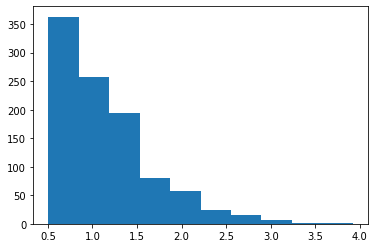

In [ ]:
import matplotlib.pyplot as plt
plt.hist(results)

In [ ]:
from scipy.stats import norm
i =0
results = []
while i <=1000:
    u = np.random.uniform(0,1)
    sn = norm.ppf(u)
    if sn>=4 and sn<=5:
        i +=1
        results.append(sn)

KeyboardInterrupt: ignored

In [ ]:
results

[4.200143557617926,
 4.682519956065282,
 4.154248990613746,
 4.060953934188397,
 4.1808653087334084,
 4.319841798498801,
 4.308181060439416,
 4.2147272335134724,
 4.192113229648546]

In [ ]:
bool('sss')

True